<a href="https://colab.research.google.com/github/eakaratp/DeepLearning_NIDA01/blob/main/HW01_EDA_Parameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [22]:
import numpy as np
print( f"NumPy {np.__version__}\n" )
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print(f"TensorFlow {tf.__version__}")
print(f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

NumPy 1.19.5

TensorFlow 2.7.0
tf.keras.backend.image_data_format() = channels_last


In [23]:
# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print(f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}")

TensorFlow detected 0 GPU(s):


# **[☠] HELLO WORLD! : We were group II** 
#Here's how we tuned the wine quality model with machine learning and deep learning



---
**Noted**  
* `Dependencies: Coding Package from Pandas , Numpy , Seaborn , Matplot, Scikit-learn, Keras, ...`
* `Runtime dependencies:  Scikit-learn requires Python>=3.7, Numpy >=1.14.6`
* `Describe any prerequisites, libraries, OS version, etc., = Python Lastest version, Needed before installing program`
* `How/where to download your program`: 
* `Any modifications needed to be made to files/folders`:
* `Data Source :  Loading [UCI wine dataset from Team's GitHubs](https://bit.ly/3GaUUt0WINE)`
---

**[☠] PLAN/TASK**

**1.) Data Cleansing**  
* Our goal is to review the quality of data we collected and identify any problems that have a negative impact on parameter tuning. 
* This includes imbalances, outliers, noise, nulls, and high correlations between features.
* During the preprocessing step, we will add the solution to fix these issues.

**2.) Data Preprocessing**
* This process is mainly to prepare data to suitable with the model which devlop to slove the problem such as feature scaling, reduce feature to optimize the variable in model

**3.) (Hyper) Parameter Tuning**  
      > Virtually any type of data analytics, data science or AI development requires some type of data preprocessing to provide reliable, precise and robust results for enterprise applications. 
* Model layer and Node. 
* Type of activation function.  
* Learning rate and Loss function.
* Batch Size and Choosing Epoch.

    **[☠] Setting Up The Environment** 
    Dependencie code in Python is imported. These lines load modules from four libraries;
    * `numpy` - The library for numerical computing in Python
    * `pandas` - A library for organizing and manipulating data
    * `matplotlib` - A library for plotting
    * `sklearn` - Short for scikit-learn, a machine learning toolkit in Python
    * `Bunch object` - Container object exposing keys as attributes.

In [24]:
#Before compiling a program that uses the same Python version, set the standard.
!pip install pyforest

In [26]:
#Set tools for dataframe and management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from platform import python_version
from sklearn import datasets
from sklearn.cluster import KMeans

In [27]:
#Plots tools
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix as sm
from matplotlib.patches import Ellipse 
from platform import python_version
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

  #**[☠] Ploblem Statement**  :  Wine Quality Dataset

    What we aim to accomplish
        > This project aims to achieve several objectives, including:
        1.   To see which Deep Learning and Machine Learning methods yield the most accurate results, and to get hand dirty tuning them!
        2.   In order to determine what feature makes a good wine, use the model answer and discuss what we learn from the exercise.

    Thus, here we go!    **⌛Loading** file....

#**[💀] 1. Import Data & Skim checking**

In [28]:
urlwq = 'https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winequality-red.csv'
df = pd.read_csv(urlwq)

df.info()
#1599 Records   |  #179 Rows   |   #12 variable 
df.sample(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Y                     1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Y
696,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
658,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
1464,6.8,0.59,0.10,1.7,0.063,34.0,53.0,0.99580,3.41,0.67,9.7,5
453,10.4,0.33,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7
80,6.2,0.45,0.20,1.6,0.069,3.0,15.0,0.99580,3.41,0.56,9.2,5
1575,7.5,0.52,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6
1248,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6
1011,8.9,0.32,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,6


In [29]:
df.info()
#1599 Records   |  #179 Rows   |   #12 variable 
df.sample(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Y                     1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Y
525,10.4,0.640,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5
637,9.5,0.885,0.27,2.3,0.084,31.0,145.0,0.99780,3.24,0.53,9.4,5
1363,8.0,0.830,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8,4
489,9.3,0.390,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.2,6
1116,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
438,10.4,0.410,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6
1561,7.8,0.600,0.26,2.0,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6


✅Skim Pass :=) The downloaded data corresponds to the script stated.

 *Try to find something?    Call your buddy,    Now Baby Stat Turn!*

✅Look at  the table  :=) Check Shape

In [30]:
#Data Table Display
from google.colab import data_table

data_table.enable_dataframe_formatter()

data_table.DataTable(df.head(), include_index=False, num_rows_per_page=20)


df.shape

(1599, 12)

✅Look at  the table  :=) Imcompleted Data 
    > Missing Value?, Null?, Duplicate?

In [31]:
# %Missing Values
print(df.isna().sum())

df.isnull().sum() / df.shape[0] * 100

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Y                       0
dtype: int64


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
Y                       0.0
dtype: float64

✅ *Summary Statistics*

We did not find anything wrong after a quick look in the upper portion. 

`df.describe()`

In [32]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Y
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### ✅ *To summarrize all operation so far:*
The dataset contains 1,599 rows and 12 columns with only float and integer value , which is where we’ll focus our analysis.



#**[💀] 2. EDA on the wine Red Wine Quality**

2.1 Check the columns's data, we will find the feature name
* Relation between 1 integer and the other float*
* Unique value in each features *italicized text*

In [33]:
from pandas.core.frame import DataFrame
DataFrame.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Y                     1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [55]:
df.columns.values

TypeError: ignored

In [35]:
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))

Number of unique values of fixed acidity : 96
Number of unique values of volatile acidity : 143
Number of unique values of citric acid : 80
Number of unique values of residual sugar : 91
Number of unique values of chlorides : 153
Number of unique values of free sulfur dioxide : 60
Number of unique values of total sulfur dioxide : 144
Number of unique values of density : 436
Number of unique values of pH : 89
Number of unique values of sulphates : 96
Number of unique values of alcohol : 65
Number of unique values of Y : 6


* 📑 The feature that has a maximum unique value is ***density***.
* 📑 The feature that has a minimum unique value is ***Y***.

2.2 Check the relationship between a numerical and one or more categorical variables
* 📑“Y” has a high number of values in categories 5, 6 and 7.
* 📑Only a few observations are there for the categories 3 & 9.
* 📑Leading to Imbalance data

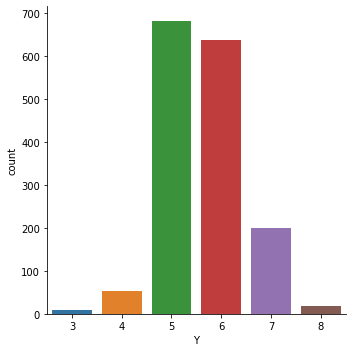

In [36]:
sns.catplot(x='Y', data=df,kind='count')

2.3 Check the correlation between variables
* 📑***Strong Correlation***
    * "*density*" has a strong positive correlation with "*residual sugar*", whereas it has a strong negative correlation with "*alcohol*".

* 📑***Negative Direction***
    * "*pH*" & "*fixed acidity*" has negative correlation.
    * "*citric acid*" & "*volatile acidity*" has negative correlation.
    
* 📑***Positive Direction***
    * "*density*" & "*fixed acidity*" has positive correlation.
    * "*citric acid*" & "*fixed acidity*" has positive correlation.
    * "*free sulphur dioxide*" & "*total sulphur dioxide*" has positive correlation.

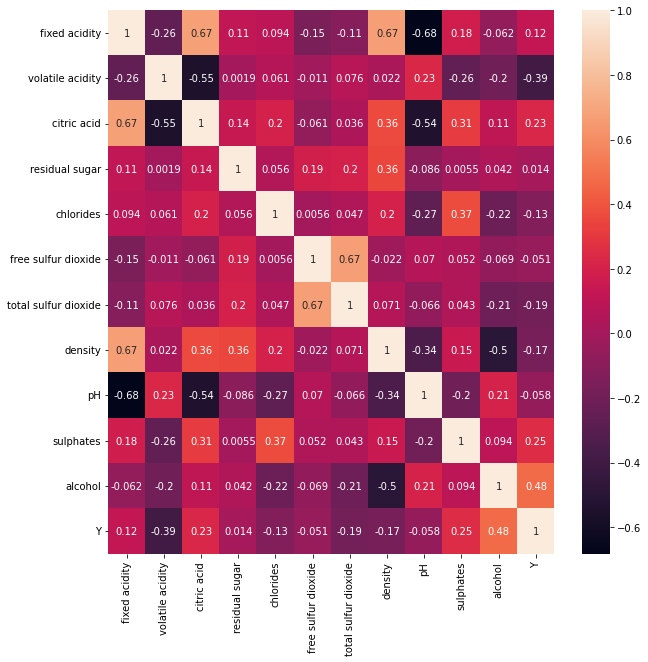

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),color="k", annot=True)

2.4 Check the variable distribution with box plot , we define the outliers are point outside the 1.5xIQR or more below the 1st quartile
* 📑Except for "***alcohol***" all other variable have outliers

* 📑Noted - Regarding from Boxplots
    * Some of the variables, e.g . free sulphur dioxide, density, "*have a few outliers*" but these are very different from the rest.
    * Mostly outliers are on the "*larger side*".
    * "*Fixed acidity*", "*volatile acidity*" and "*citric acid*" have outliers.
  > If those outliers are eliminated distribution of the variables may be taken to be symmetric.
    * "*Residual sugar*" has a positively skewed distribution; 
  > Even after eliminating the outliers distribution will remain skewed.


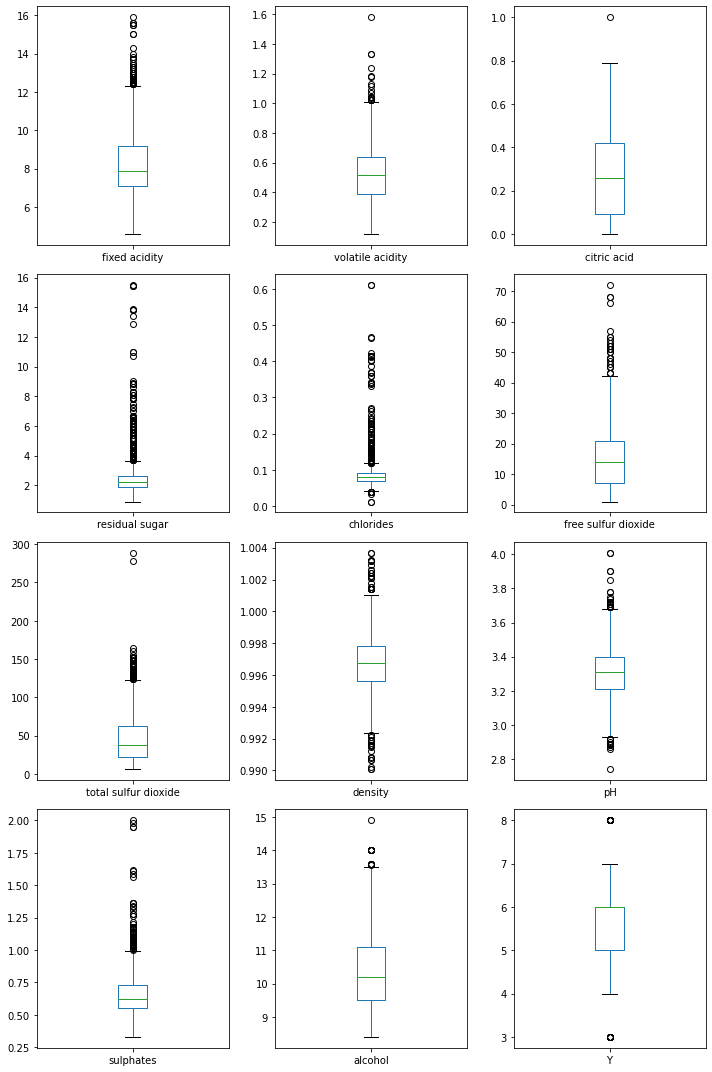

In [38]:
plt.figure(figsize=(10,15))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

✅2.4 (Removeal or Outliers) Treating the outliers that we have detected using Boxplot in the previous section as follow step;

*   All data are in lower bound (Q1x1.5xIQR) and upper bound (Q3x1.5xIQR) will replace with "*NULL Value*"
*   List item



In [ ]:
#Select the Outliner and replace with NULL value
##for i in [df.columns.values]:  ##revise to variable "List" here to variable
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[i] < min,i] = np.nan
    df.loc[df[i] > max,i] = np.nan

In [ ]:
#Have 2 way to do this step  "Impute" or "Drop"
##If impute (Mean, Median, KNN), see the skwness before cheese step